## **CROP RECOMMENDATION  USING ML**

### STEP 1: Reading and Understanding the Data
 Let's start with the following steps:

- 1.Importing data using the pandas library
- 2.Understanding the structure of the data

In [1]:
# Import necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the given CSV file, and view some sample records
data = pd.read_csv("Crop_dataset.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil rainfall - rainfall in mm

Let's inspect the various aspects of our dataframe

### Renaming the columns    

In [3]:
data.columns = ["Nitrogen", "Phosphorus", "Potassium", "Temperature", "Humidity", "pH", "Rainfall", "Crop"]
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# Checking the shape
data.shape

(2200, 8)

In [5]:
# Checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
# Describibg the data
data.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Step 2: Visualising the Data
- Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated .

In [7]:
# Finding correlation
data[['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH','Rainfall']].corr()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
pH,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


### Splitting data into dependent and independent variables

In [8]:
x = data.iloc[:, :-1].values # independent
y = data.iloc[:, -1].values # dependent

In [9]:
x

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [10]:
y

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

### Displaying the unique features

In [11]:
np.unique(y)

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

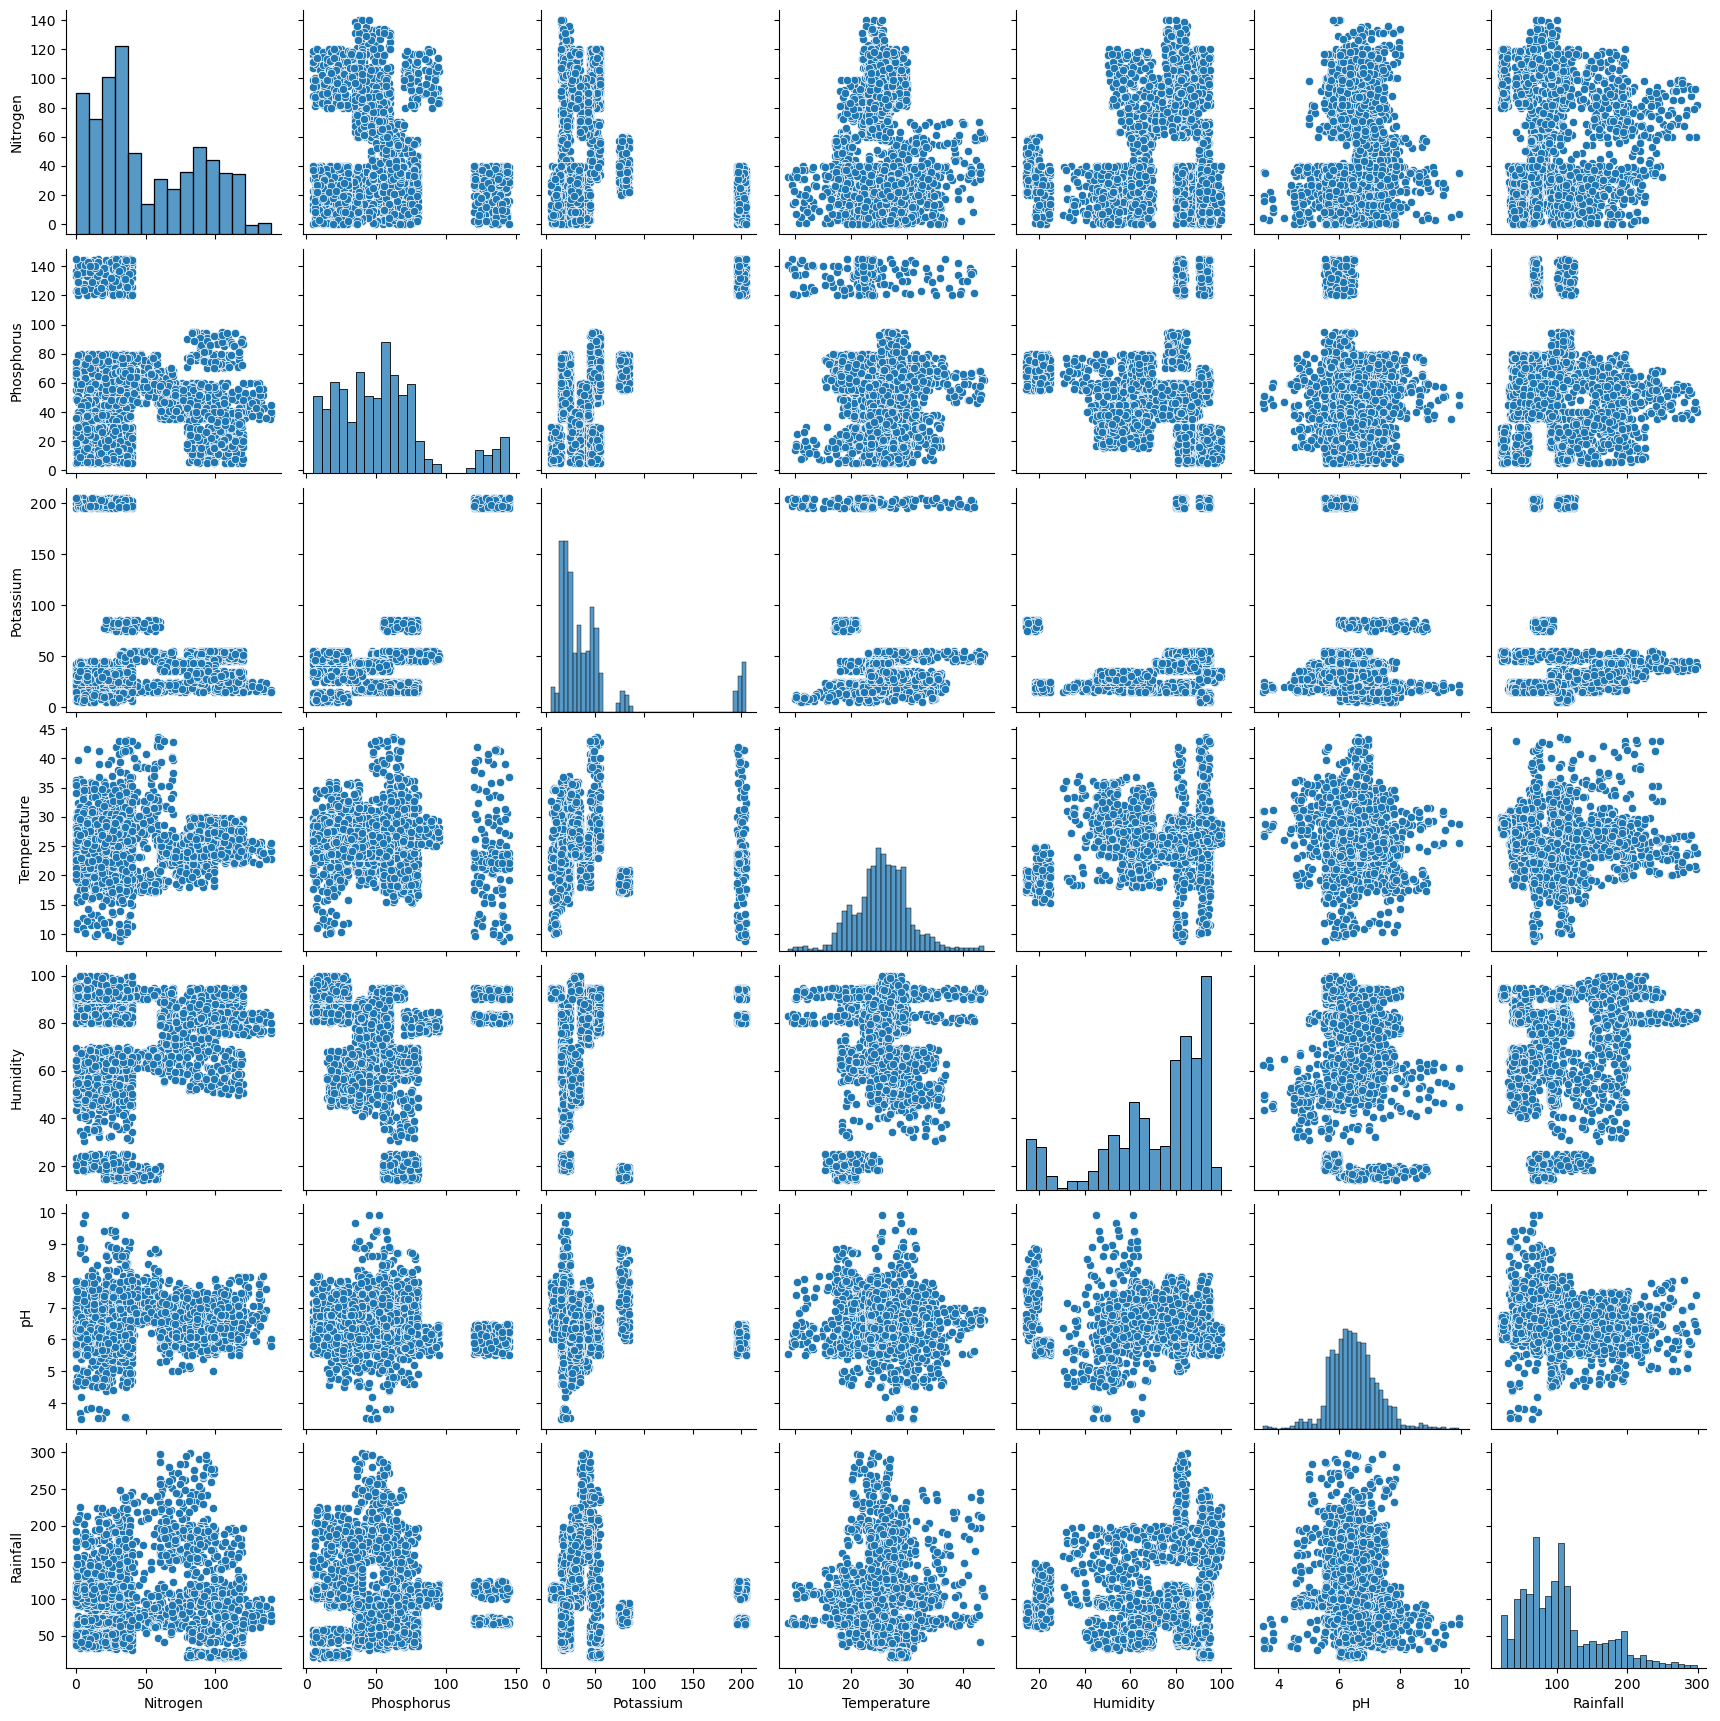

In [12]:
sns.pairplot(data=data)

In [13]:
len(np.unique(y))

22

### Visualizing crop vs climate features using boxplots

<Axes: xlabel='pH', ylabel='Crop'>

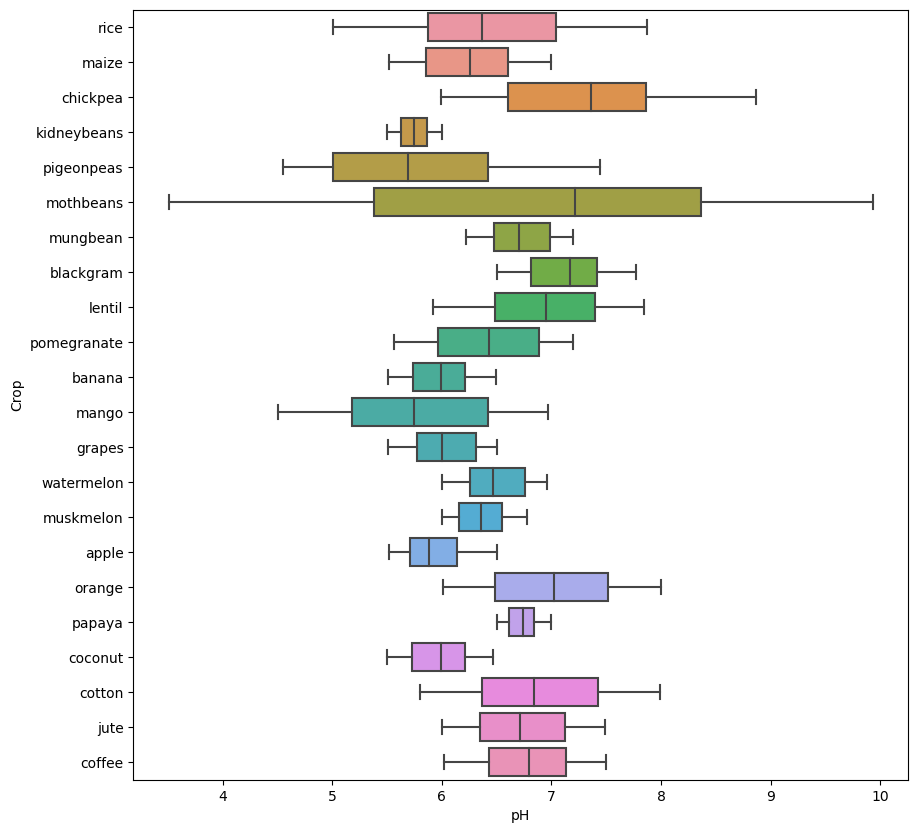

In [14]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y='Crop',x='pH',data=data)

<Axes: xlabel='Temperature', ylabel='Crop'>

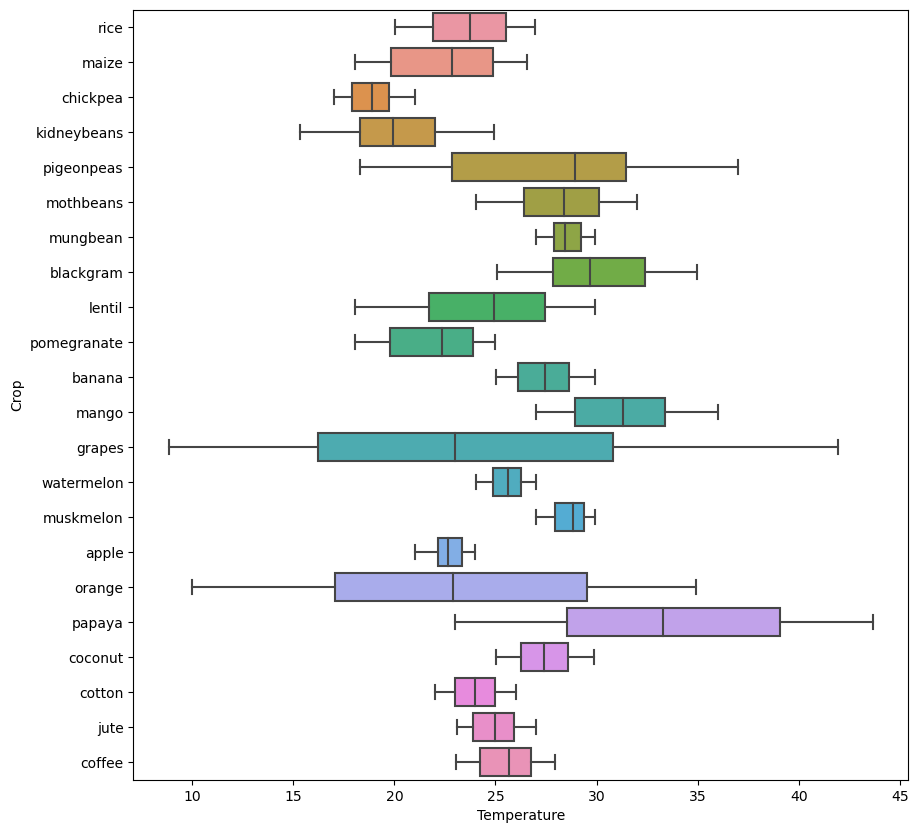

In [15]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y='Crop',x='Temperature',data=data)

<Axes: xlabel='Rainfall', ylabel='Crop'>

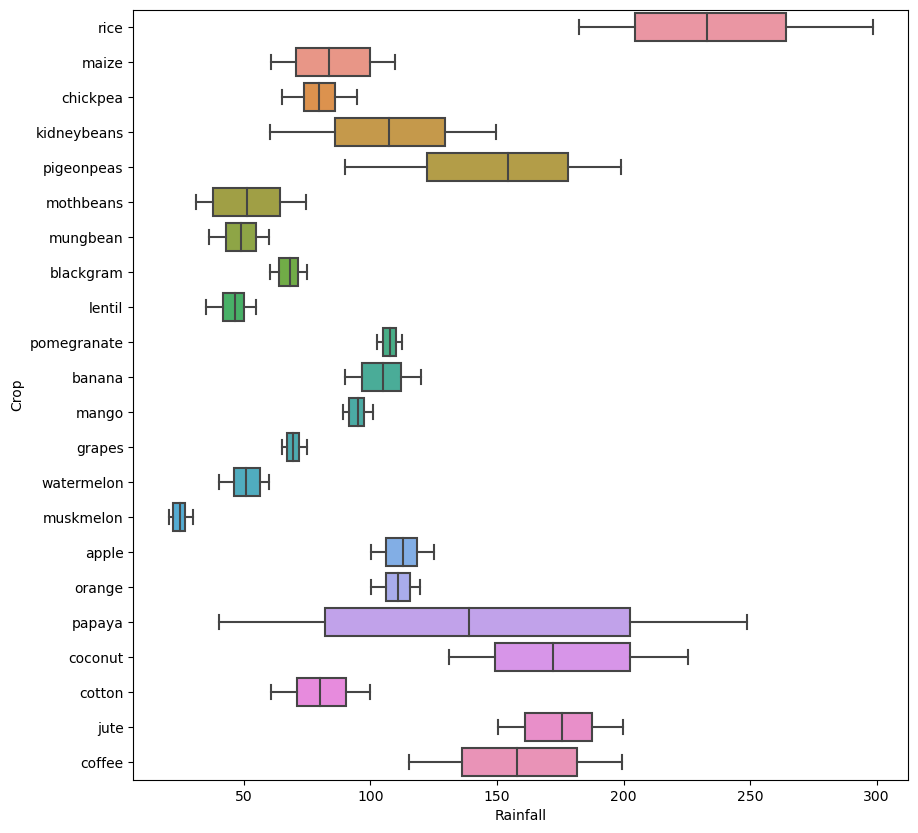

In [16]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y='Crop',x='Rainfall',data=data)

### Encoding categorical values

In [17]:
np.unique(y)

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [18]:
# Perform One-Hot Encoding on 'Crop' column
encoded_data = pd.get_dummies(data, columns=['Crop'], drop_first=True)
encoded_data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop_banana,Crop_blackgram,Crop_chickpea,...,Crop_mango,Crop_mothbeans,Crop_mungbean,Crop_muskmelon,Crop_orange,Crop_papaya,Crop_pigeonpeas,Crop_pomegranate,Crop_rice,Crop_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,85,58,41,21.770462,80.319644,7.038096,226.655537,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,60,55,44,23.004459,82.320763,7.840207,263.964248,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,74,35,40,26.491096,80.158363,6.980401,242.864034,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,78,42,42,20.130175,81.604873,7.628473,262.717340,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [19]:
encoded_data.replace({True: 1, False: 0}, inplace=True)
encoded_data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop_banana,Crop_blackgram,Crop_chickpea,...,Crop_mango,Crop_mothbeans,Crop_mungbean,Crop_muskmelon,Crop_orange,Crop_papaya,Crop_pigeonpeas,Crop_pomegranate,Crop_rice,Crop_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [21]:
x

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

### Splitting training and testing data

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [23]:
x_train.shape

(1760, 7)

In [24]:
x_test.shape

(440, 7)

In [25]:
y_train.shape

(1760,)

In [26]:
y_test.shape

(440,)

## Training the Decision tree Model

In [27]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

### Testing the Model

In [28]:
pred_dt = dt_classifier.predict(x_test)

### Calculating Accuracy Score

In [29]:
# Accuracy
dt_accuracy = accuracy_score(y_test, pred_dt)
print("Accuracy:", dt_accuracy)

Accuracy: 0.9886363636363636


### Calculating Precision Score

In [30]:
# Precision
dt_precision = precision_score(y_test, pred_dt,average="weighted")
print("Precision:", dt_precision)

Precision: 0.9889971139971141


### Calculating Recall Score

In [31]:
# Recall
dt_recall = recall_score(y_test, pred_dt,average="weighted")
print("Recall:", dt_recall)

Recall: 0.9886363636363636


### Calculating F1 Score

In [32]:
# F1 Score
dt_f1 = f1_score(y_test, pred_dt,average="weighted")
print("F1 Score:", dt_f1)

F1 Score: 0.988595068964984


### Train_Score

In [33]:
dt_training_score = dt_classifier.score(x_train, y_train)
print("Training Score:", dt_training_score)

Training Score: 1.0


### Test_Score

In [34]:
dt_testing_score = dt_classifier.score(x_test, y_test)
print("Testing Score:", dt_testing_score)

Testing Score: 0.9886363636363636


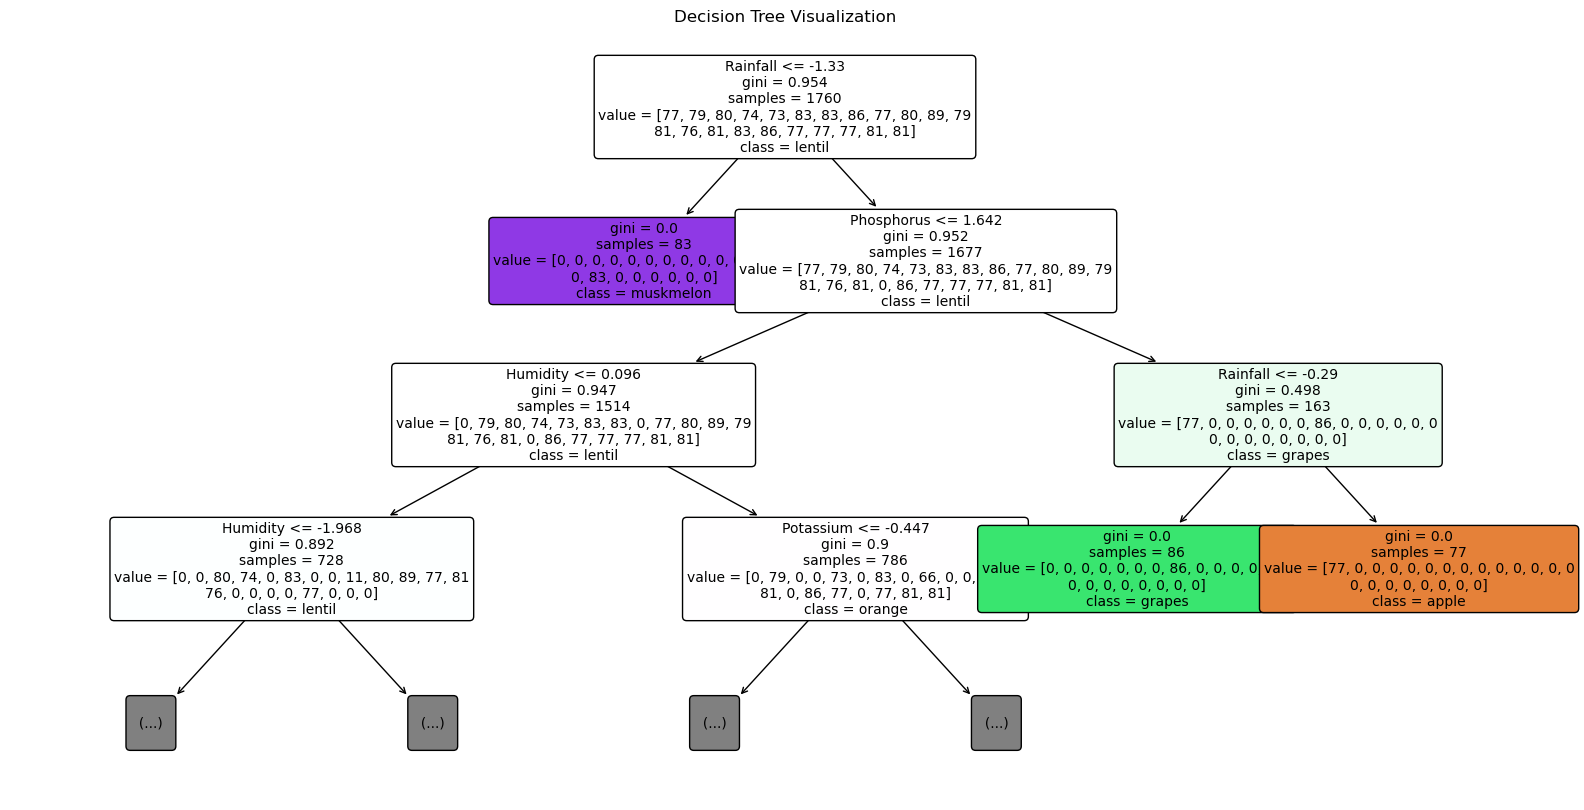

In [35]:
from sklearn.tree import plot_tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall'],
          class_names=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'],
          filled=True,
          rounded=True,
          max_depth= 3,
          fontsize=10)

plt.title("Decision Tree Visualization")
plt.show()


## Training Support Vector Machine (SVM) model

In [36]:
# Create and fit the classifier
svm_classifier = SVC(kernel='rbf', random_state=0)
svm_classifier.fit(x_train, y_train)

SVC(random_state=0)

### Testing the Model

In [37]:
svc_pred = svm_classifier.predict(x_test)

### Calculating Accuracy Score

In [38]:
# Accuracy
svm_accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.9681818181818181


### Calculating Precision Score

In [39]:
# Precision
svm_precision = precision_score(y_test, svc_pred,average="weighted")
print("Precision:", svm_precision)

Precision: 0.9715171192443921


### Calculating Recall Score


In [40]:
# Recall
svm_recall = recall_score(y_test, svc_pred,average="weighted")
print("Recall:", svm_recall)

Recall: 0.9681818181818181


### Calculating F1 Score

In [41]:
# F1 Score
svm_f1 = f1_score(y_test, svc_pred,average="weighted")
print("F1 Score:", svm_f1)

F1 Score: 0.9680271341017991


### Train_Score

In [42]:
svm_training_score = svm_classifier.score(x_train, y_train)
print("Training Score:", svm_training_score)

Training Score: 0.9880681818181818


### Test_Score

In [43]:
svm_testing_score = svm_classifier.score(x_test, y_test)
print("Testing Score:", svm_testing_score)

Testing Score: 0.9681818181818181


## Training SGD MOdel

In [44]:
sgd_classifier = SGDClassifier()
sgd_classifier.fit(x_train, y_train)

SGDClassifier()

### Testing the Model

In [45]:
pred_sgd = sgd_classifier.predict(x_test)

### Calculating Accuracy score

In [46]:
from sklearn.metrics import accuracy_score
sgd_accuracy=accuracy_score(y_test, pred_sgd)
sgd_accuracy

0.8818181818181818

### Calculating Precision Score

In [47]:
# Precision
sgd_precision = precision_score(y_test, pred_sgd,average="weighted")
print("Precision:", sgd_precision)

Precision: 0.937104820504953


### Calculating Recall Score

In [48]:
# Recall
sgd_recall = recall_score(y_test, pred_sgd,average="weighted")
print("Recall:", sgd_recall)

Recall: 0.8818181818181818


### Calculating F1 Score

In [49]:
# F1 Score
sgd_f1 = f1_score(y_test, pred_sgd,average="weighted")
print("F1 Score:", sgd_f1)

F1 Score: 0.8964409540329338


### Train_Score

In [50]:
sgd_training_score = sgd_classifier.score(x_train, y_train)
print("Training Score:", sgd_training_score)

Training Score: 0.9119318181818182


### Test_Score

In [51]:
sgd_testing_score = sgd_classifier.score(x_train, y_train)
print("Testing Score:", sgd_testing_score)

Testing Score: 0.9119318181818182


## Training the KNN Classifier

In [52]:
kn_classifier = KNeighborsClassifier(n_neighbors = 23, metric = 'minkowski', p = 2)
kn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

### Testing the Model

In [53]:
y_pred_knn = kn_classifier.predict(x_test)

### Calculating Accuracy score

In [54]:
from sklearn.metrics import  accuracy_score
kn_accuracy=accuracy_score(y_test, y_pred_knn)
kn_accuracy

0.9159090909090909

### Calculating Precision Score

In [55]:
# Precision
kn_precision = precision_score(y_test, y_pred_knn,average="weighted")
print("Precision:", kn_precision)

Precision: 0.9335022169317924


### Calculating Recall Score

In [56]:
# Recall
kn_recall = recall_score(y_test, y_pred_knn,average="weighted")
print("Recall:", kn_recall)

Recall: 0.9159090909090909


### Calculating F1 Score

In [57]:
# F1 Score
kn_f1 = f1_score(y_test, y_pred_knn,average="weighted")
print("F1 Score:", kn_f1)

F1 Score: 0.9135531099766033


### Train_Score

In [58]:
kn_training_score = kn_classifier.score(x_train, y_train)
print("Training Score:", kn_training_score)

Training Score: 0.9528409090909091


### Test_Score

In [59]:
kn_testing_score = kn_classifier.score(x_test, y_test)
print("Testing Score:", kn_testing_score)

Testing Score: 0.9159090909090909


## Training the Ensemble Model

In [60]:
from sklearn.ensemble import VotingClassifier
models = [("DT", dt_classifier),
         ("SGD", sgd_classifier),
          ("KNN", kn_classifier)]

vt_classifier = VotingClassifier(estimators=models, voting="hard")

In [61]:
vt_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                             ('SGD', SGDClassifier()),
                             ('KNN', KNeighborsClassifier(n_neighbors=23))])

##  Testing the Model

In [62]:
pred_vt = vt_classifier.predict(x_test)

##  Calculating accuracy score

In [63]:
en_accuracy=accuracy_score(y_test, pred_vt)
en_accuracy

0.9590909090909091

### Calculating Precision Score

In [64]:
# Precision
en_precision = precision_score(y_test, pred_vt,average="weighted")
print("Precision:", en_precision)

Precision: 0.9657395382395383


### Calculating Recall Score

In [65]:
# Recall
en_recall = recall_score(y_test, pred_vt,average="weighted")
print("Recall:", en_recall)

Recall: 0.9590909090909091


### Calculating F1 Score

In [66]:
# F1 Score
en_f1 = f1_score(y_test, pred_vt,average="weighted")
print("F1 Score:", en_f1)

F1 Score: 0.959641052824413


### Train_Score

In [67]:
en_training_score = vt_classifier.score(x_train, y_train)
print("Training Score:", en_training_score)

Training Score: 0.9829545454545454


### Test_Score

In [68]:
en_testing_score = vt_classifier.score(x_test ,y_test)
print("Testing Score:", en_testing_score)

Testing Score: 0.9590909090909091


## Training Random Forest Model

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [70]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### Testing the Model

In [71]:
y_pred_RF = rf_classifier.predict(x_test)

### Calculating accuracy score

In [72]:
rf_accuracy = accuracy_score(y_test, y_pred_RF)
rf_accuracy

0.9931818181818182

### Calculating Precision Score

In [73]:
# Precision
rf_precision = precision_score(y_test, y_pred_RF,average="weighted")
print("Precision:", rf_precision)

Precision: 0.9937348484848485


### Calculating Recall Score

In [74]:
# Recall
rf_recall = recall_score(y_test, y_pred_RF,average="weighted")
print("Recall:", rf_recall)

Recall: 0.9931818181818182


### Calculating F1 Score

In [75]:
# F1 Score
rf_f1 = f1_score(y_test, y_pred_RF,average="weighted")
print("F1 Score:", rf_f1)

F1 Score: 0.9931754816901672


### Train_Score

In [76]:
rf_training_score = rf_classifier.score(x_train, y_train)
print("Training Score:", rf_training_score)

Training Score: 1.0


### Test_Score

In [77]:
rf_testing_score = rf_classifier.score(x_test, y_test)
print("Testing Score:", rf_testing_score)

Testing Score: 0.9931818181818182


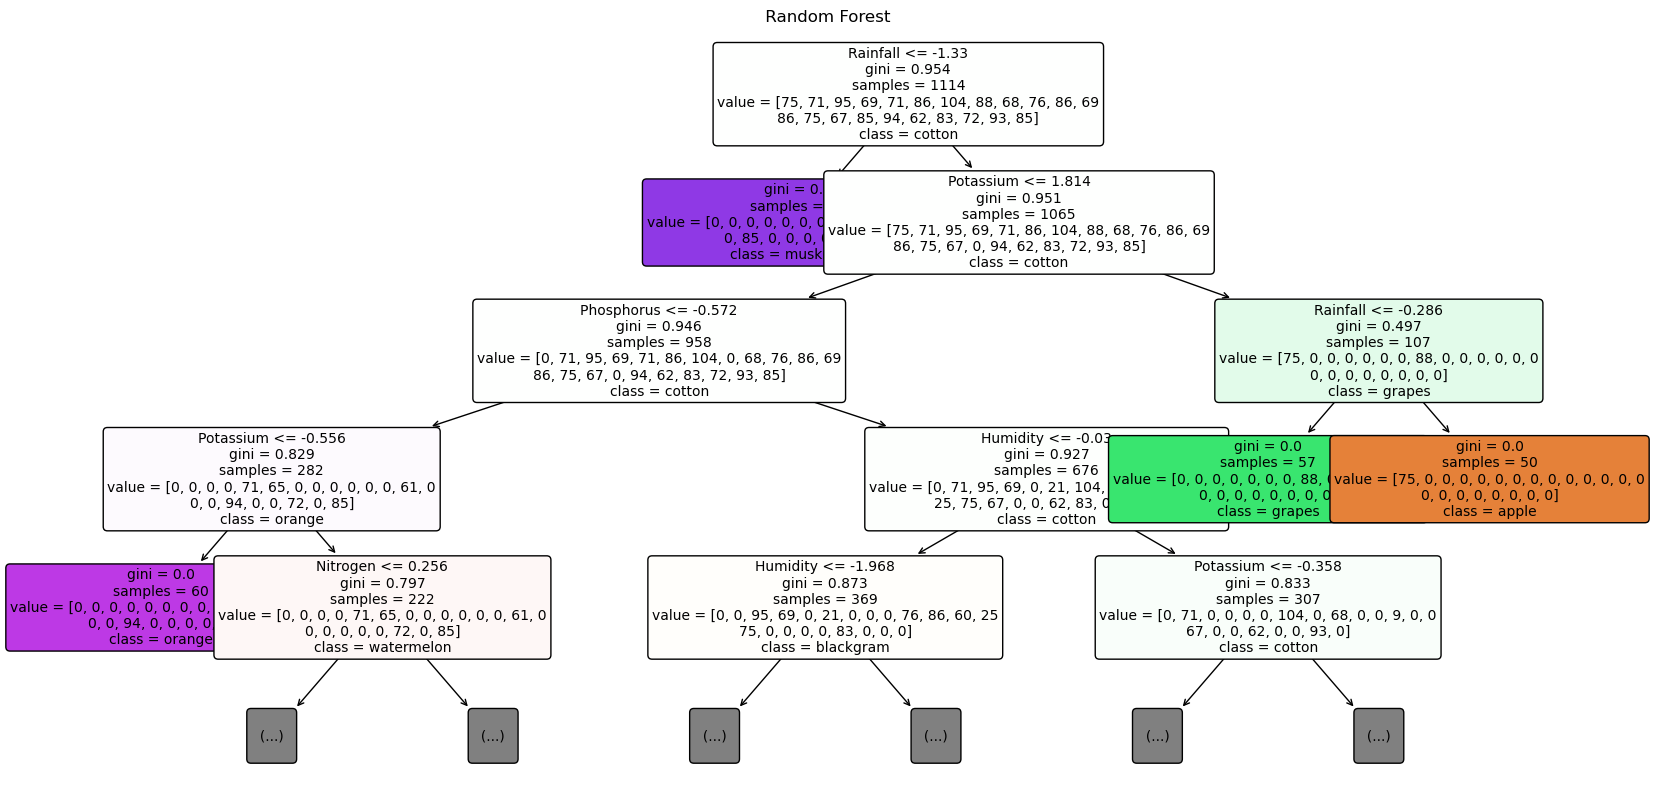

In [78]:
estimator = rf_classifier.estimators_[0] 
plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=['Nitrogen', 'Phosphorus', 'Potassium',
                         'Temperature', 'Humidity', 'pH', 'Rainfall'],
          class_names=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
                       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
                       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
                       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'],
          filled=True,
          rounded=True,
          max_depth=4,
          fontsize=10)

plt.title(" Random Forest")
plt.show()


## Training Logistic Regression Model

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [80]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

### Testing the Model

In [81]:
y_pred_LR = logistic_model.predict(x_test)

### Calculating accuracy score

In [82]:
lr_accuracy = accuracy_score(y_test, y_pred_LR)
lr_accuracy

0.9636363636363636

### Calculating Precision Score

In [83]:
# Precision
lr_precision = precision_score(y_test, y_pred_LR,average="weighted")
print("Precision:", lr_precision)

Precision: 0.9644420567548909


### Calculating Recall Score

In [84]:
# Recall
lr_recall = recall_score(y_test, y_pred_LR,average="weighted")
print("Recall:", lr_recall)

Recall: 0.9636363636363636


### Calculating F1 Score

In [85]:
# F1 Score
lr_f1 = f1_score(y_test, y_pred_LR,average="weighted")
print("F1 Score:", lr_f1)

F1 Score: 0.9635115059268676


### Train_Score

In [86]:
lr_training_score=logistic_model.score(x_train,y_train)
print("Training score :",lr_training_score)

Training score : 0.977840909090909


### Test_Score

In [87]:
lr_testing_score=logistic_model.score(x_test,y_test)
print("Testing score :",lr_testing_score)

Testing score : 0.9636363636363636


In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [89]:
Navie_Bayes_classifier = GaussianNB()
Navie_Bayes_classifier.fit(x_train, y_train)

GaussianNB()

### Testing the Model

In [90]:
y_pred_NB = Navie_Bayes_classifier.predict(x_test)

### Calculating accuracy score

In [91]:
nv_accuracy = accuracy_score(y_test, y_pred_NB)
nv_accuracy

0.9954545454545455

### Calculating Precision Score

In [92]:
# Precision
nv_precision = precision_score(y_test, y_pred_NB,average="weighted")
print("Precision:", nv_precision)

Precision: 0.9958181818181817


### Calculating Recall Score

In [93]:
# Recall
nv_recall = recall_score(y_test, y_pred_NB,average="weighted")
print("Recall:", nv_recall)

Recall: 0.9954545454545455


### Calculating F1 Score

In [94]:
# F1 Score
nv_f1 = f1_score(y_test, y_pred_NB,average="weighted")
print("F1 Score:", nv_f1)

F1 Score: 0.9954229797979799


### Train_Score

In [95]:
nv_training_score = Navie_Bayes_classifier.score(x_train, y_train)
print("Training Score:", nv_training_score)

Training Score: 0.9948863636363636


### Test_Score

In [96]:
nv_testing_score = Navie_Bayes_classifier.score(x_test, y_test)
print("Testing Score:", nv_testing_score)

Testing Score: 0.9954545454545455


## FINAL CONCLUSIONS

In [97]:
Index=['Accuracy_Score','Precision_Score','Recall_Score','F1_Score','Train_Score','Test_Score']

In [98]:
conclusion = pd.DataFrame({'DT_Model':[dt_accuracy,dt_precision,dt_recall,dt_f1,dt_training_score,dt_testing_score],
           'SGD_Model':[sgd_accuracy,sgd_precision,sgd_recall,sgd_f1,sgd_training_score,sgd_testing_score],
            'KNN_Model':[kn_accuracy,kn_precision,kn_recall,kn_f1,kn_training_score,kn_testing_score],
            'Ensemble_Model':[en_accuracy,en_precision,en_recall,en_f1,en_training_score,en_testing_score],
            'Random Forest_Model':[rf_accuracy,rf_precision,rf_recall,rf_f1,rf_training_score,rf_testing_score],
            'SVM_Model':[svm_accuracy,svm_precision,svm_recall,svm_f1,svm_training_score,svm_testing_score],
            'Logistic Regression_Model':[lr_accuracy,lr_precision,lr_recall,lr_f1,lr_training_score,lr_testing_score],
            'Navie Bayes_Model':[nv_accuracy,nv_precision,nv_recall,nv_f1,nv_training_score,nv_testing_score]},index=Index)

In [99]:
summary_of_models=(round(conclusion,2))
summary_of_models

,DT_Model,SGD_Model,KNN_Model,Ensemble_Model,Random Forest_Model,SVM_Model,Logistic Regression_Model,Navie Bayes_Model
Accuracy_Score,0.99,0.88,0.92,0.96,0.99,0.97,0.96,1.00
Precision_Score,0.99,0.94,0.93,0.97,0.99,0.97,0.96,1.00
Recall_Score,0.99,0.88,0.92,0.96,0.99,0.97,0.96,1.00
F1_Score,0.99,0.90,0.91,0.96,0.99,0.97,0.96,1.00
Train_Score,1.00,0.91,0.95,0.98,1.00,0.99,0.98,0.99
Test_Score,0.99,0.91,0.92,0.96,0.99,0.97,0.96,1.00


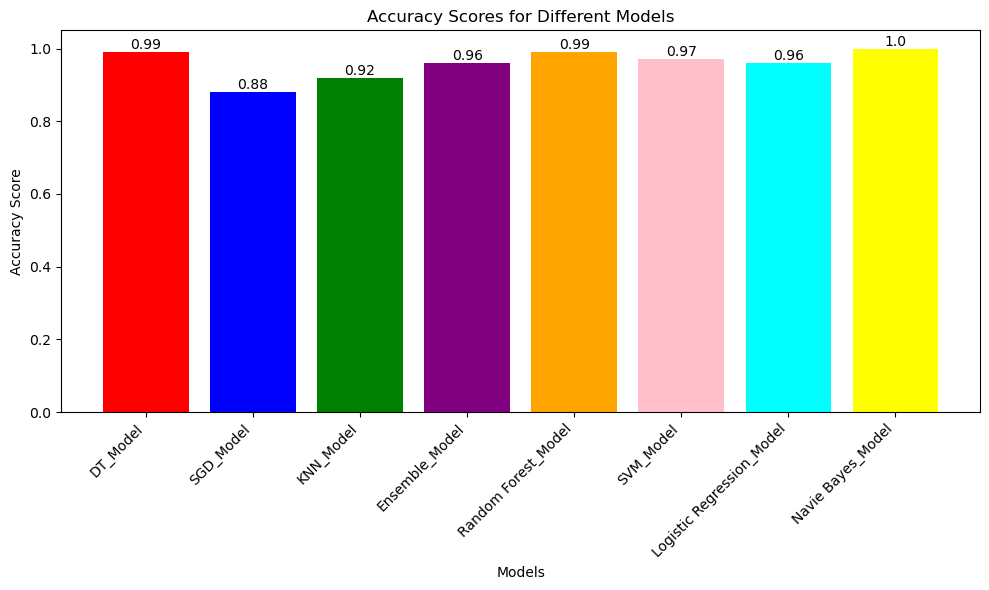

In [100]:
import matplotlib.pyplot as plt

models = ['DT_Model', 'SGD_Model', 'KNN_Model', 'Ensemble_Model', 'Random Forest_Model', 'SVM_Model', 'Logistic Regression_Model', 'Navie Bayes_Model']
accuracy_scores = [summary_of_models[model].iloc[0] for model in models]
colors = [
    'red', 'blue', 'green', 'purple', 'orange',
    'pink', 'cyan', 'yellow'
]

plt.figure(figsize=(10, 6))  
bars = plt.bar(models, accuracy_scores, color=colors)  
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Different Models")
plt.xticks(rotation=45, ha='right')  

for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             str(round(score, 2)), ha='center', va='bottom')

plt.tight_layout()  
plt.show()


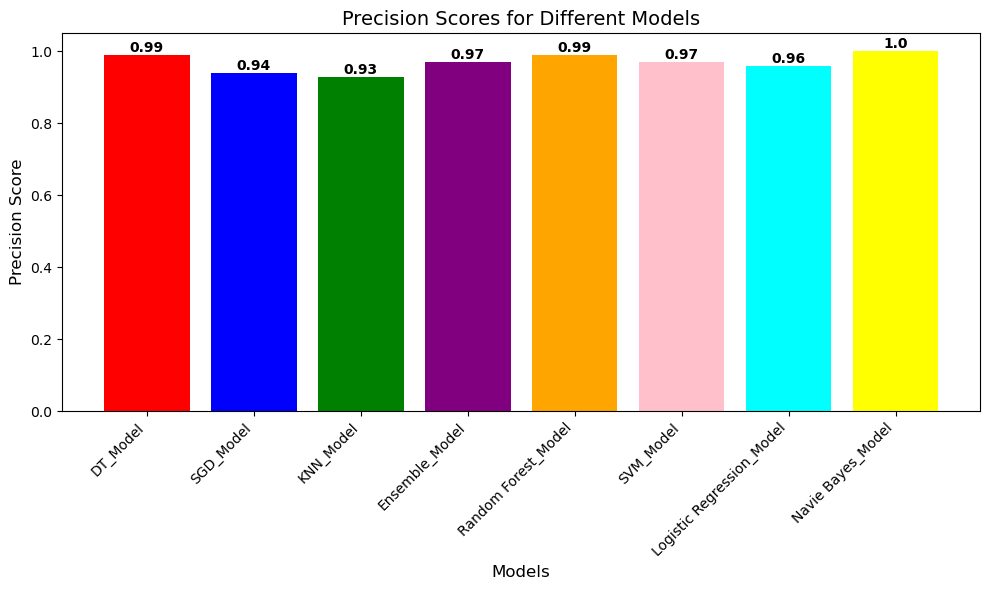

In [101]:

models = [
    'DT_Model', 'SGD_Model', 'KNN_Model', 'Ensemble_Model',
    'Random Forest_Model', 'SVM_Model', 'Logistic Regression_Model', 'Navie Bayes_Model'
]


precision_scores = [summary_of_models[model].iloc[1] for model in models]
colors = [
    'red', 'blue', 'green', 'purple', 'orange',
    'pink', 'cyan', 'yellow'
]


plt.figure(figsize=(10, 6))  
bars = plt.bar(models, precision_scores, color=colors)  
plt.xlabel("Models", fontsize=12)
plt.ylabel("Precision Score", fontsize=12)
plt.title("Precision Scores for Different Models", fontsize=14)


plt.xticks(rotation=45, ha='right')

for bar, score in zip(bars, precision_scores):
    plt.text(
        bar.get_x() + bar.get_width() / 2, bar.get_height(),
        str(round(score, 2)), ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.tight_layout()
plt.show()

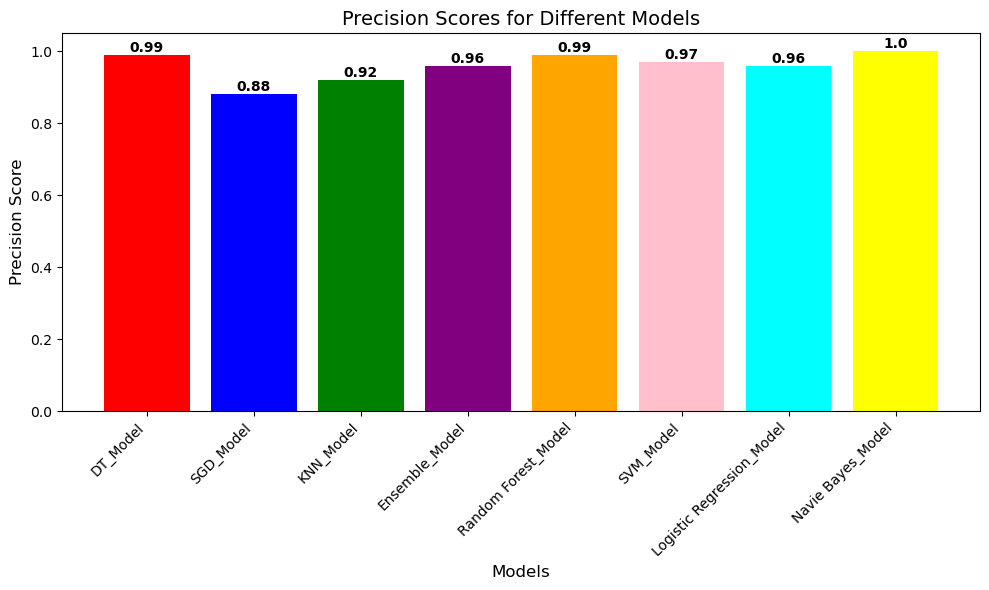

In [102]:
models = [
    'DT_Model', 'SGD_Model', 'KNN_Model', 'Ensemble_Model',
    'Random Forest_Model', 'SVM_Model', 'Logistic Regression_Model', 'Navie Bayes_Model'
]

recall_scores = [summary_of_models[model].iloc[2] for model in models]
colors = [
    'red', 'blue', 'green', 'purple', 'orange',
    'pink', 'cyan', 'yellow'
]

plt.figure(figsize=(10, 6))  
bars = plt.bar(models, recall_scores, color=colors) 
plt.xlabel("Models", fontsize=12)
plt.ylabel("Precision Score", fontsize=12)
plt.title("Precision Scores for Different Models", fontsize=14)
plt.xticks(rotation=45, ha='right')
for bar, score in zip(bars, recall_scores):
    plt.text(
        bar.get_x() + bar.get_width() / 2, bar.get_height(),
        str(round(score, 2)), ha='center', va='bottom', fontsize=10, fontweight='bold'
    )


plt.tight_layout()
plt.show()

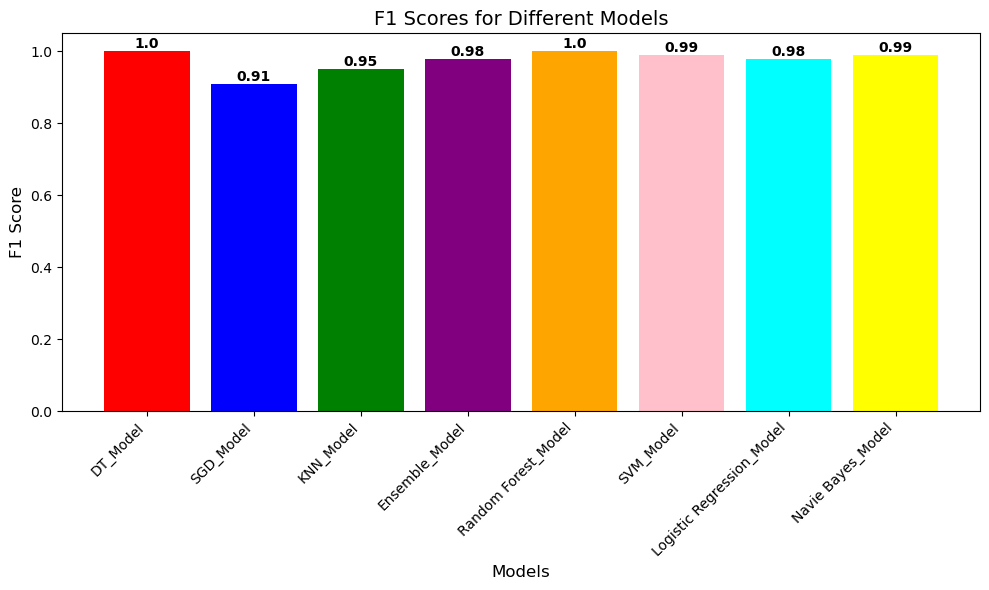

In [103]:
import matplotlib.pyplot as plt
models = [
    'DT_Model', 'SGD_Model', 'KNN_Model', 'Ensemble_Model',
    'Random Forest_Model', 'SVM_Model', 'Logistic Regression_Model',  'Navie Bayes_Model'
]
f1_scores = [summary_of_models[model].iloc[4] for model in models]
colors = [
    'red', 'blue', 'green', 'purple', 'orange',
    'pink', 'cyan', 'yellow'
]

plt.figure(figsize=(10, 6)) 
bars = plt.bar(models, f1_scores, color=colors)  
plt.xlabel("Models", fontsize=12)
plt.ylabel("F1 Score", fontsize=12)  
plt.title("F1 Scores for Different Models", fontsize=14) 
plt.xticks(rotation=45, ha='right')
for bar, score in zip(bars, f1_scores):
    plt.text(
        bar.get_x() + bar.get_width() / 2, bar.get_height(),
        str(round(score, 2)), ha='center', va='bottom', fontsize=10, fontweight='bold'
    )
plt.tight_layout()
plt.show()


# **CONCLUSION**
The **Naive Bayes model** achieved the highest performance with a perfect average score of 1.00, followed closely by **Random Forest** (0.99) and **Decision Tree** (0.98). These results indicate that all models perform well, but the choice should depend on the specific requirements of the application.

In [107]:
import pickle
with open('trained_crop_model.pkl', 'wb') as f:
    pickle.dump(Navie_Bayes_classifier, f)

## Testing on foreign data

In [108]:
outside_data = np.array([[60, 55, 45, 21.408, 83.329, 5.935, 287.576]])
outside_data = sc.transform(outside_data)

In [109]:
outside_data

array([[ 0.25598625,  0.04964684, -0.06219024, -0.83124202,  0.53225002,
        -0.69075533,  3.35079335]])

In [110]:
sgd_classifier.predict(outside_data)

array(['rice'], dtype='<U11')

In [111]:
svm_classifier.predict(outside_data)

array(['rice'], dtype=object)

In [112]:
kn_classifier.predict(outside_data)

array(['rice'], dtype=object)

In [113]:
vt_classifier.predict(outside_data)

array(['rice'], dtype=object)

In [114]:
dt_classifier.predict(outside_data)

array(['rice'], dtype=object)

In [115]:
rf_classifier.predict(outside_data)

array(['rice'], dtype=object)

In [116]:
logistic_model.predict(outside_data)

array(['rice'], dtype=object)

In [117]:
Navie_Bayes_classifier.predict(outside_data)

array(['rice'], dtype='<U11')